### Namespaces

A namespace is a space that holds names(identifiers).Programmatically speaking, namespaces are dictionary of identifiers(keys) and their objects(values)

There are 4 types of namespaces:
- Builtin Namespace
- Global Namespace
- Enclosing Namespace
- Local Namespace

### Scope and LEGB Rule

A scope is a textual region of a Python program where a namespace is directly accessible.

The interpreter searches for a name from the inside out, looking in the local, enclosing, global, and finally the built-in scope. If the interpreter doesn’t find the name in any of these locations, then Python raises a NameError exception.

In [ ]:
# local and global
# global var
a = 2

def temp():
  # local var
  b = 3
  print(b)

temp()
print(a)

3
2


In [ ]:
# local and global -> same name
a = 2

def temp():
  # local var
  a = 3
  print(b)

temp()
print(a)

In [ ]:
# local and global -> local does not have but global has
a = 2

def temp():
  # local var
  print(a)

temp()
print(a)


2
2


In [ ]:
# local and global -> editing global
a = 2

def temp():
  # local var
  a += 1
  print(a)

temp()
print(a)

UnboundLocalError: ignored

In [ ]:
a = 2

def temp():
  # local var
  global a
  a += 1
  print(a)

temp()
print(a)

3
3


In [ ]:
# local and global -> global created inside local
def temp():
  # local var
  global a
  a = 1
  print(a)

temp()
print(a)

In [ ]:
# local and global -> function parameter is local
def temp(z):
  # local var
  print(z)

a = 5
temp(5)
print(a)
print(z)

5
5


NameError: ignored

In [ ]:
# built-in scope
import builtins
print(dir(builtins))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWarning', 'SystemError

In [ ]:
# how to see all the built-ins

In [ ]:
# renaming built-ins
L = [1,2,3]
print(max(L))
def max():
  print('hello')

print(max(L))

TypeError: ignored

In [ ]:
# Enclosing scope
def outer():
  def inner():
    print(a)
  inner()
  print('outer function')


outer()
print('main program')

1
outer function
main program


In [ ]:
# nonlocal keyword
def outer():
  a = 1
  def inner():
    nonlocal a
    a += 1
    print('inner',a)
  inner()
  print('outer',a)


outer()
print('main program')

inner 2
outer 2
main program


In [ ]:
# Summary

### Decorators

A decorator in python is a function that receives another function as input and adds some functionality(decoration) to and it and returns it.

This can happen only because python functions are 1st class citizens.

There are 2 types of decorators available in python
- `Built in decorators` like `@staticmethod`, `@classmethod`, `@abstractmethod` and `@property` etc
- `User defined decorators` that we programmers can create according to our needs

In [ ]:
# Python are 1st class function

def modify(func,num):
  return func(num)

def square(num):
  return num**2

modify(square,2)

4

In [ ]:
# simple example

def my_decorator(func):
  def wrapper():
    print('***********************')
    func()
    print('***********************')
  return wrapper

def hello():
  print('hello')

def display():
  print('hello nitish')

a = my_decorator(hello)
a()

b = my_decorator(display)
b()

***********************
hello
***********************
***********************
hello nitish
***********************


In [ ]:
# more functions

In [ ]:
# how this works -> closure?

In [ ]:
# python tutor

In [ ]:
# Better syntax?
# simple example

def my_decorator(func):
  def wrapper():
    print('***********************')
    func()
    print('***********************')
  return wrapper

@my_decorator
def hello():
  print('hello')

hello()

***********************
hello
***********************


In [ ]:
# anything meaningful?
import time

def timer(func):
  def wrapper(*args):
    start = time.time()
    func(*args)
    print('time taken by',func.__name__,time.time()-start,'secs')
  return wrapper

@timer
def hello():
  print('hello wolrd')
  time.sleep(2)

@timer
def square(num):
  time.sleep(1)
  print(num**2)

@timer
def power(a,b):
  print(a**b)

hello()
square(2)
power(2,3)


hello wolrd
time taken by hello 2.003671884536743 secs
4
time taken by square 1.0009939670562744 secs
8
time taken by power 2.1696090698242188e-05 secs


In [ ]:
# A big problem

In [ ]:
# One last example -> decorators with arguments

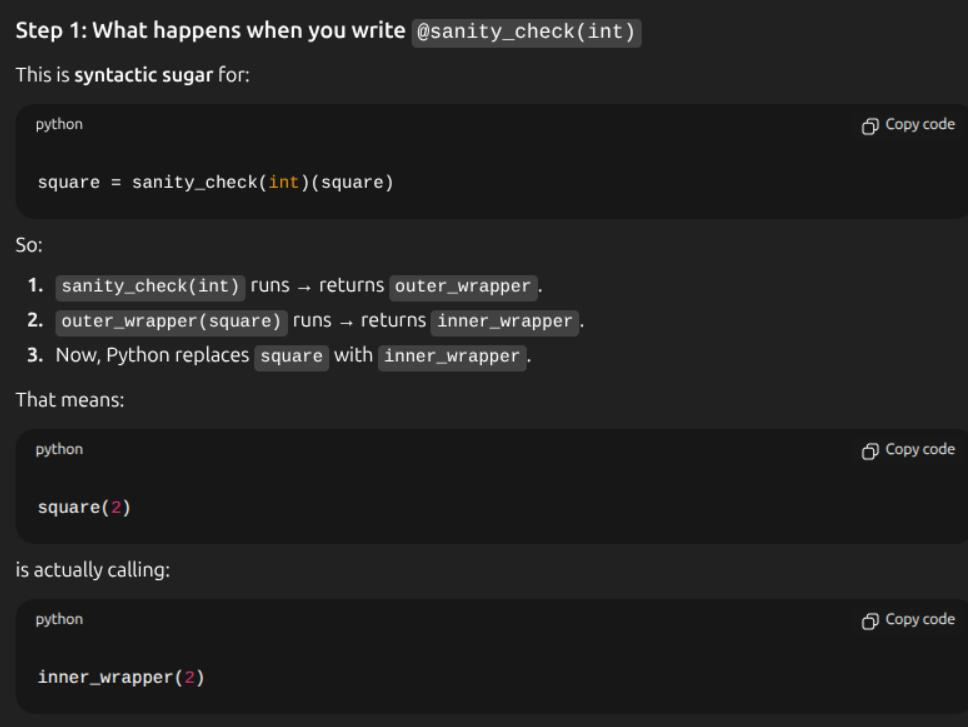
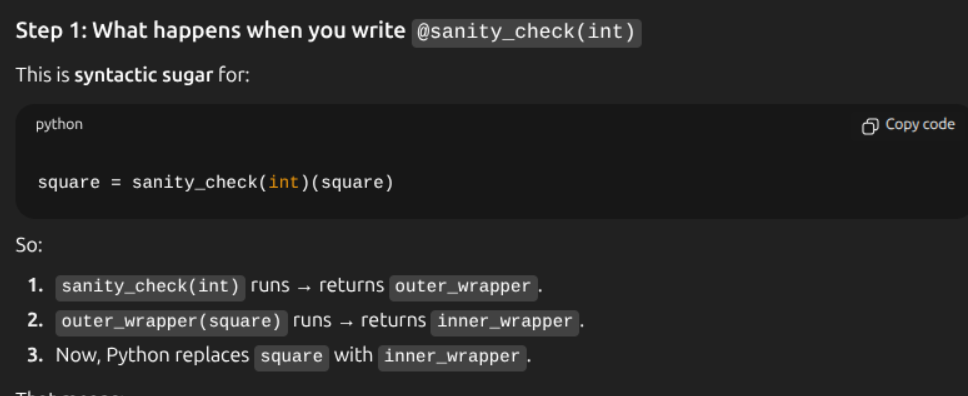

In [ ]:
@checkdt(int)
def square(num):
  print(num**2)

In [ ]:
def sanity_check(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(args[0]) == data_type:
        return func(*args)   # ✅ unpack args properly
      else:
        raise TypeError('Ye datatype nai chalega')
    return inner_wrapper
  return outer_wrapper

@sanity_check(int)
def square(num):
  print(num**2)

@sanity_check(str)
def greet(name):
  print('hello', name)

square(2)     # works
greet("Aayush") # works


4
